# Code Assignment 2: Data Visualization and Analysis

This dataset contains more of 10, 000 rows and more than 10 columns. It includes features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. In order to explore the data and make it ready for modeling, please do the following work:

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 1. Dropping the duplicate rows.

A huge data set like this one often have some duplicate data. Duplicate data might be disturbing. Please remove all the duplicate values from the data-set. 

**Hint: please check *pandas.DataFrame.duplicated()* and *pandas.dataframe..drop_duplicates()* functions.**

In [2]:
def hasDuplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print("\nDuplicates exist in the DataFrame.")
    else:
        print("\nNo duplicates found in the DataFrame.")

In [3]:
hasDuplicates(df)


Duplicates exist in the DataFrame.


In [4]:
nodup_df = df.copy().drop_duplicates()

In [5]:
hasDuplicates(nodup_df)


No duplicates found in the DataFrame.


## 2. Dropping the missing or null values.

Similar to the previous step, please detect all the missing values and dropped all the observations (rows) that have any missing values. 

**Hint: please check *pandas.DataFrame.isnull()* and *pandas.DataFrame.dropna()* functions.**

In [6]:
def hasMissingVals(df):
    missing_values = df.isna()

    # Check if any missing values exist
    if missing_values.any().any():
        print("\nMissing values exist in the DataFrame.")
    else:
        print("\nNo missing values found in the DataFrame.")

In [7]:
hasMissingVals(nodup_df)


Missing values exist in the DataFrame.


In [8]:
noDupsOrNA_df = nodup_df.dropna()

In [9]:
hasMissingVals(noDupsOrNA_df)


No missing values found in the DataFrame.


## 3. Detecting Outliers

Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. Please remove the outliers.

In [10]:
def hasOutliers(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        try:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
        except: continue 
    if outliers.any().any():
        print("\nOutliers exist in the DataFrame.")
    else:
        print("\nNo outliers found in the DataFrame.")

In [11]:
hasOutliers(noDupsOrNA_df)


Outliers exist in the DataFrame.


In [12]:
def rmOutliers(df):
    norm_df = pd.DataFrame()
    for column in df.columns:
        try:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            norm_df[column] = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        except:
            norm_df[column] = df[column]
            continue
    return norm_df

In [13]:
cleaned_df = rmOutliers(noDupsOrNA_df)

## 4. Data Visualization 

Often outliers can be seen with visualizations using a **box plot**. Please draw box plots for MSRP, Engine Cylinders, and Engine HP variables to show that most outliers has been removed.

In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. Please plot **histogram** or **bar chart** to lets us know the total number of car manufactured by a different company.

We generally use scatter plots to find the correlation between two variables. Please draw the **scatter plots** between Engine HP and MSRP (market price) so that we can explore the correlation between these two variables.

### Box Plot

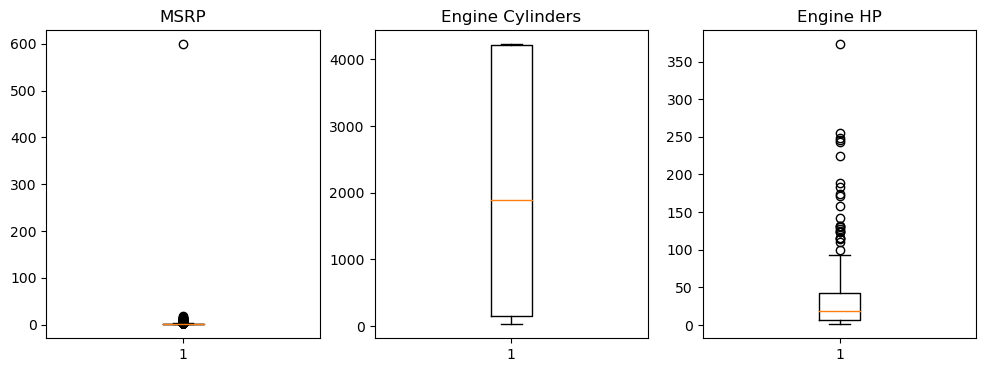

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].boxplot(cleaned_df['MSRP'].value_counts())
axes[0].set_title('MSRP')

axes[1].boxplot(cleaned_df['Engine Cylinders'].value_counts())
axes[1].set_title('Engine Cylinders')

axes[2].boxplot(cleaned_df['Engine HP'].value_counts())
axes[2].set_title('Engine HP')

plt.show()

### Bar Chart

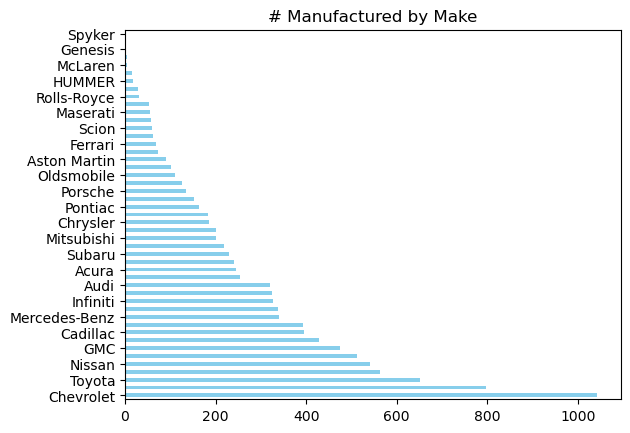

In [15]:
car_count = cleaned_df['Make'].value_counts()
car_count.plot(kind='barh', color='skyblue',title='# Manufactured by Make')
plt.yticks(np.arange(0, len(car_count), step=2))
plt.show()

### Scatter Plot

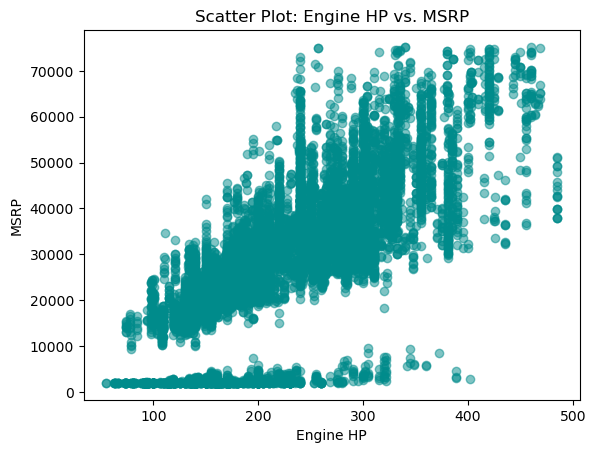

In [16]:
plt.scatter(cleaned_df['Engine HP'], cleaned_df['MSRP'], color='darkcyan', alpha=0.5)
plt.title('Scatter Plot: Engine HP vs. MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()